In [1]:
import math
import random
import numpy as np

from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
def euclidean_distance(p, q):    
    if type(p) == int:
        p = [ p ]
    if type(q) == int:
        q = [ q ]
    
    assert len(p) == len(q)
    return math.sqrt( \
        np.sum([ (x1 - x2) ** 2 for x1, x2 in zip(p, q) ]) \
    )

def get_k_nearest_neighbors(ti, training_set, k=None):
    if k == None:
        k = len(training_set)
    
    assert k >= 0
    assert len(training_set) >= k
    
    return sorted([ \
            ( r, euclidean_distance(ti[:-1], r[:-1]) ) \
            for r in training_set \
        ], key = lambda x: x[1] \
    )[:k]

def get_estimate_from_neighbors(test_item, training_set, k=None):
    neighbors = get_k_nearest_neighbors( \
                    test_item, training_set, k)

    cast_votes = [ \
        int(neighbor[-1]) \
        for neighbor, distance in neighbors ]
    
    distinct_votes = {}
    for vote in cast_votes:
        if not vote in distinct_votes.keys():
            distinct_votes[vote] = 0
        distinct_votes[vote] += 1
        
    return sorted(distinct_votes.items(), \
                  key=lambda x: x[1], reverse=True)[0][0]

def run_iteration(test_set, training_set, k):
    results = []
    for test_item in test_set:
        target = get_estimate_from_neighbors(
                     test_item, training_set, k)
        
        results.append(
            (test_item[:-1], test_item[-1], target)
        )
    
    return results

In [3]:
random.seed(11)

X, y = datasets.load_iris(return_X_y=True)
dataset = np.concatenate([X, np.matrix(y).T], axis=1)

SPLIT = .7
train_set = []; test_set = [];
for r in dataset:
    row = r.tolist()[0]
    if random.random() < SPLIT:
        test_set.append(row)
        continue
    
    train_set.append(row)

In [4]:
def compute_accuracy(results):
    return ( 
        np.sum([ r[1] == r[2] for r in results ]) / len(results) 
    ) * 100.0

rs = []
max_length = len(train_set)
for k in range(1, max_length):
    accuracy = compute_accuracy(
        run_iteration(test_set, train_set, k))
    
    rs.append(
        (k, accuracy)
    )

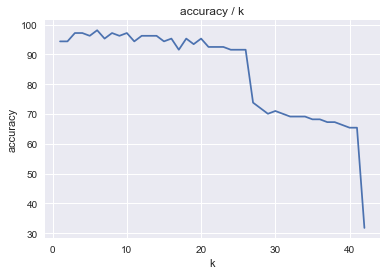

In [5]:
_ = plt.plot([x[0] for x in rs], [x[1] for x in rs])

_ = plt.title('accuracy / k')
_ = plt.xlabel('k')
_ = plt.ylabel('accuracy')

plt.show()